In [2]:
'''Retrieve all inputs executed in the current kernel section'''
%history

# Plot the sse over a range of clusters in order to choose the best cluster number
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=1000).fit(df_ltv)
    sse[k] = kmeans.inertia_ 

warnings.filterwarnings('default')

plt.figure(figsize=(6,4))
plt.plot(list(sse.keys()), list(sse.values()),color=colors[0])
plt.xlabel('Clusters')
plt.grid()
plt.show()
'''Retrieve all inputs executed in the current kernel section'''
%history


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings

In [4]:
print('Pandas version -> %s' % pd.__version__)
print('Numpy version -> %s' % np.__version__)
print('Seaborn version -> %s' % sns.__version__)

Pandas version -> 2.1.2
Numpy version -> 1.26.1
Seaborn version -> 0.13.0


In [5]:
df_sales_data = pd.read_csv('sales_data_cleaned.csv', index_col='Unnamed: 0',
                                    dtype={  'InvoiceDate': 'string',
                                             'InvoiceMonth': 'category',
                                             'DayPart': 'category',
                                             'InvoiceNo': 'category',
                                             'CustomerID': 'string',
                                             'Country': 'category',
                                             'StockCode': 'category',
                                             'Quantity': 'int64',
                                             'UnitPrice': 'float64',
                                             'Revenue': 'float64'},
                                    parse_dates=['InvoiceDate'])

In [6]:
df_sales_data.head()

,InvoiceDate,InvoiceMonth,DayPart,InvoiceNo,CustomerID,Country,StockCode,Quantity,UnitPrice,Revenue
0,2010-12-01,2010-12,Morning,536365,17850,United Kingdom,85123A,6,2.55,15.30
1,2010-12-01,2010-12,Morning,536365,17850,United Kingdom,71053,6,3.39,20.34
2,2010-12-01,2010-12,Morning,536365,17850,United Kingdom,84406B,8,2.75,22.00
3,2010-12-01,2010-12,Morning,536365,17850,United Kingdom,84029G,6,3.39,20.34
4,2010-12-01,2010-12,Morning,536365,17850,United Kingdom,84029E,6,3.39,20.34


In [7]:
# the data was cleaned in another notebook
df_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392688 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceDate   392688 non-null  datetime64[ns]
 1   InvoiceMonth  392688 non-null  category      
 2   DayPart       392688 non-null  category      
 3   InvoiceNo     392688 non-null  category      
 4   CustomerID    392688 non-null  string        
 5   Country       392688 non-null  category      
 6   StockCode     392688 non-null  category      
 7   Quantity      392688 non-null  int64         
 8   UnitPrice     392688 non-null  float64       
 9   Revenue       392688 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(2), int64(1), string(1)
memory usage: 21.4 MB


In [8]:
# Color palette to keep the following plots harmonic
colors = sns.color_palette("tab20", 20)
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [9]:
# Removing outliers
df_ltv = df_sales_data.groupby('CustomerID')['Revenue'].sum().reset_index().rename(
                            columns={'Revenue': 'LTV'})

df_ltv_outliers_removed = df_ltv[df_ltv['LTV'] <= df_ltv['LTV'].quantile(0.95)]

print(f'Outliers rows removed: {len(df_ltv)-len(df_ltv_outliers_removed):,}')

Outliers rows removed: 217


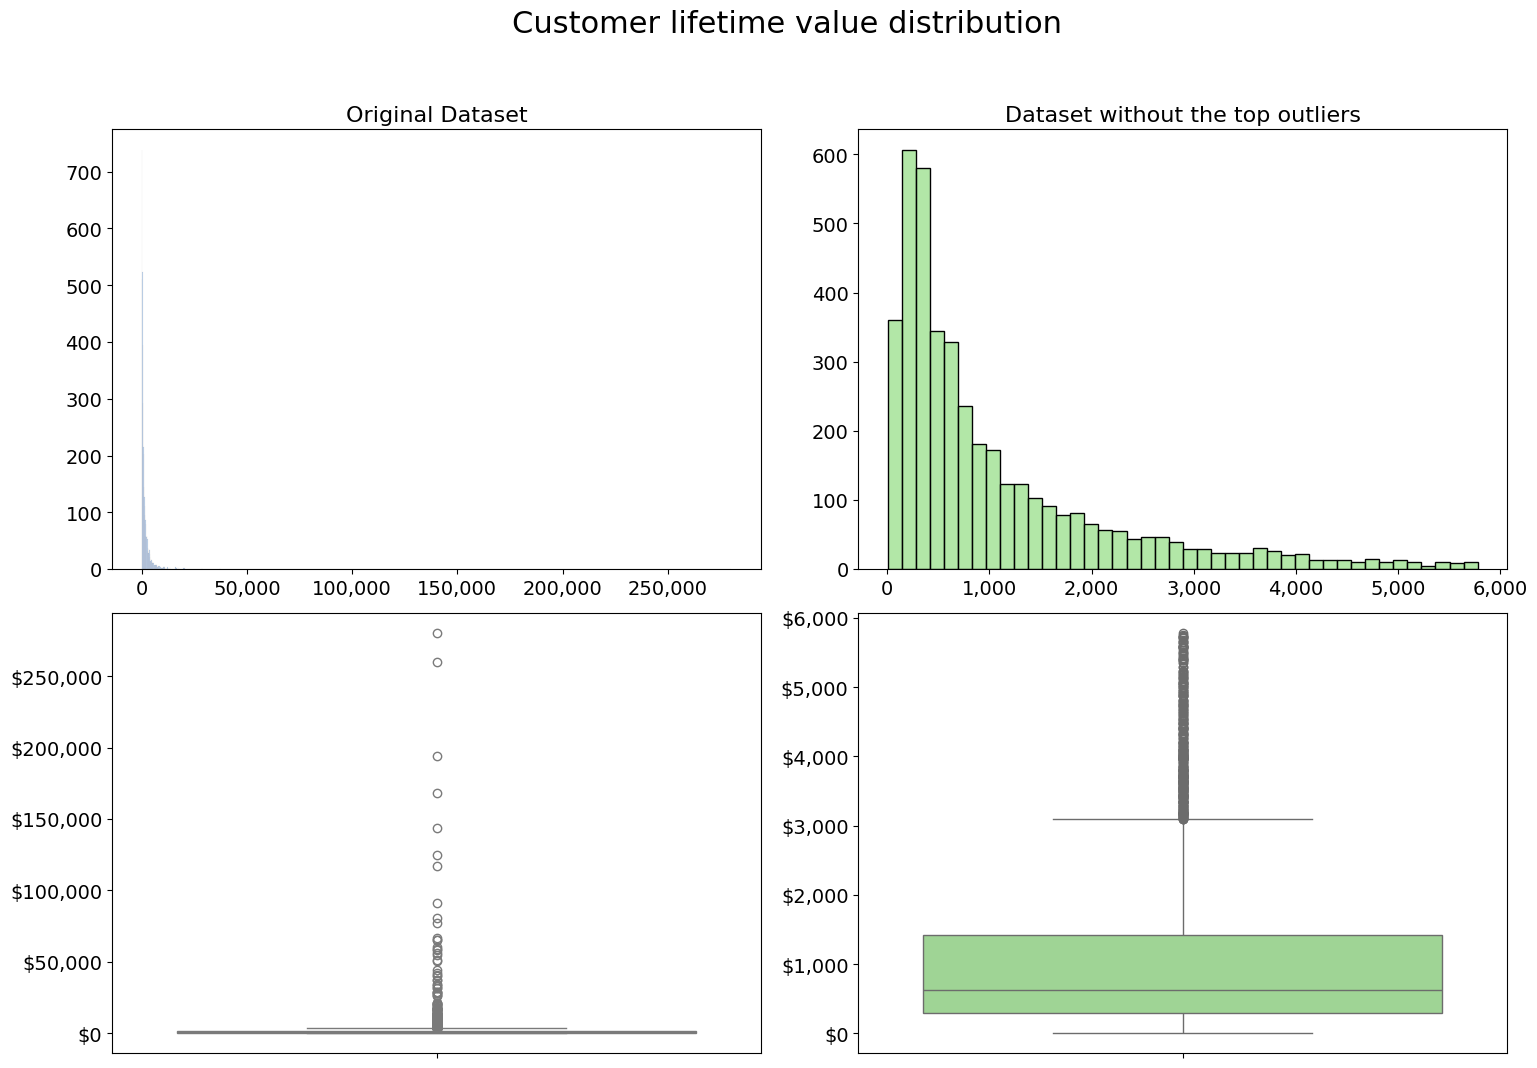

In [10]:
# Create a figure showing the LTV distribution
warnings.filterwarnings('ignore')

fig, axs = plt.subplot_mosaic([['upperL', 'upperR',],
                               ['lowerL', 'lowerR']],
                               figsize=(18, 12))

# Plot graphs
sns.histplot(df_ltv['LTV'], color=colors[1], ax=axs['upperL'])
sns.histplot(df_ltv_outliers_removed['LTV'], color=colors[5], ax=axs['upperR'])
sns.boxplot(y='LTV', data=df_ltv, color=colors[1], ax=axs['lowerL'])
sns.boxplot(y='LTV', data=df_ltv_outliers_removed, color=colors[5], ax=axs['lowerR'])

# Edit axis
for plot in ['upperL', 'upperR']:
    axs[plot].set(xlabel=None)
    axs[plot].set(ylabel=None)
    vals = axs[plot].get_yticks()
    axs[plot].set_yticklabels([f'{x:,.0f}' for x in vals], fontsize = 14)
    vals = axs[plot].get_xticklabels()
    axs[plot].set_xticklabels([x for x in vals], fontsize = 14)
    axs[plot].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
for plot in ['lowerL', 'lowerR']:
    axs[plot].set(xlabel=None)
    axs[plot].set(ylabel=None)
    vals = axs[plot].get_yticks()
    axs[plot].set_yticklabels([f'${x:,.0f}' for x in vals], fontsize = 14)
    
# Add titles to figure and each column    
fig.suptitle('Customer lifetime value distribution', fontsize = 22)
axs['upperL'].set_title('Original Dataset', fontsize=16)
axs['upperR'].set_title('Dataset without the top outliers', fontsize=16)

# Adjust the spacing between the plots
fig.subplots_adjust(wspace=0.15, hspace=0.1)

plt.show()
        
warnings.filterwarnings('default')

In [37]:
df_ltv = df_ltv_outliers_removed.copy()

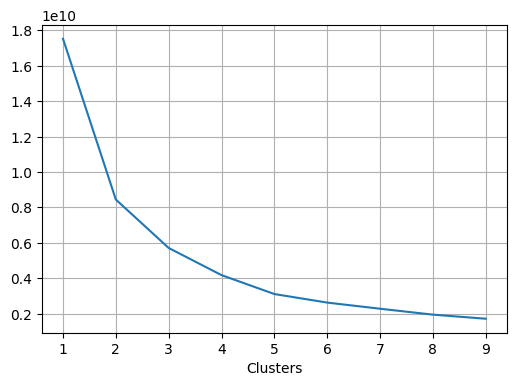

In [38]:
# Plot the sse over a range of clusters in order to choose the best cluster number
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=1000).fit(df_ltv)
    sse[k] = kmeans.inertia_ 

warnings.filterwarnings('default')

plt.figure(figsize=(6,4))
plt.plot(list(sse.keys()), list(sse.values()),color=colors[0])
plt.xlabel('Clusters')
plt.grid()
plt.show()

In [39]:
# Perform K-means clustering with 5 clusters and fitting the customers into groups
ltv_kmeans = KMeans(n_clusters=5,n_init=10,max_iter=300)
df_ltv['Cluster'] = ltv_kmeans.fit_predict(df_ltv[['LTV']])

In [40]:
# Define a dictionary to map cluster indices to LTV categories
ltv_mapping= {'0':'Low','1': 'Mid-Low','2':'Mid', '3':'Mid-High', '4':'High'}

df_ltv['Cluster'] = df_ltv['Cluster'].astype('string')
df_ltv['Category'] = df_ltv['Cluster'].map(ltv_mapping)

In [41]:
#ltv describe
sort_order_dict = {'Low':0, 'Mid-Low':1, 'Mid':2, 'Mid-High': 3, 'High':4}

df_ltv.groupby(['Category'], as_index=False).describe().sort_values(by=['Category'], key = lambda x: x.map(sort_order_dict))

Category     LTV                                                         \
              count         mean         std      min        25%       50%   
1       Low  2017.0   295.971120  150.676181     3.75   168.3100   290.250   
4   Mid-Low   564.0  1827.807482  299.242930  1375.71  1570.1650  1797.640   
2       Mid   173.0  4696.200347  566.143129  3883.25  4167.2200  4630.350   
3  Mid-High  1037.0   918.299634  221.012324   607.53   716.0000   885.470   
0      High   330.0  3062.368848  422.948603  2461.24  2690.4375  2998.245   

                       
         75%      max  
1   408.5900   606.91  
4  2070.2700  2446.60  
2  5140.6600  5781.73  
3  1090.2400  1372.80  
0  3441.3825  3861.00

In [42]:
#ltv class prediction with RFM scores
df_rfm = pd.read_csv('customer_rfm.csv', index_col='Unnamed: 0',
                        dtype={ 'CustomerID': 'string',
                                'Frequency': 'int64',
                                'Recency': 'int64',
                                'Monetary': 'float64',
                                'r_score': 'int64',
                                'f_score': 'int64',
                                'm_score': 'int64',                               
                                'RFM': 'int64'})

df_ltv = pd.merge(df_ltv,df_rfm,how='left',on='CustomerID')

df_ltv_customers = df_ltv[['CustomerID','Category']]
df_ltv.drop(['CustomerID','Category'],axis=1,inplace=True)

In [52]:
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics

predictors = df_ltv.drop(['Cluster','Monetary'],axis=1)
targets = df_ltv['Cluster']

X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=.2)

param = {"max_depth": [3, None],
         "min_samples_leaf": range(1,9),
         "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

DecisionTree_Model = RandomizedSearchCV(tree, param, cv=5)
RandomForest_Model = RandomizedSearchCV(rf, param, cv=5)

DecisionTree_Model = DecisionTree_Model.fit(X_train,y_train)
RandomForest_Model = RandomForest_Model.fit(X_train,y_train)

In [53]:
#models accuracies
DecisionTree_Predictions = DecisionTree_Model.predict(X_test)
RandomForest_Predictions = RandomForest_Model.predict(X_test)

DecisionTree_Acc = sklearn.metrics.accuracy_score(y_test, DecisionTree_Predictions)
RandomForest_Acc = sklearn.metrics.accuracy_score(y_test, RandomForest_Predictions)
 
print('Decision Tree accuracy score: %2.2f %%'  % (DecisionTree_Acc*100))
print('Random Forest accuracy score: %2.2f %%'  % (RandomForest_Acc*100))

Decision Tree accuracy score: 99.88 %
Random Forest accuracy score: 99.88 %


In [54]:
#LTV mapping and prediction results
ltv_mapping = {'0':'Low','1': 'Mid-Low','2':'Mid', '3':'Mid-High', '4':'High'}

comparing_results = pd.DataFrame({'Actual': y_test,'Prediction':DecisionTree_Predictions})

comparing_results[['Actual','Prediction']] = comparing_results[['Actual','Prediction']].astype('string')
comparing_results['Actual'] = comparing_results['Actual'].map(ltv_mapping)
comparing_results['Prediction'] = comparing_results['Prediction'].map(ltv_mapping)

sort_order_dict = {'Low':0, 'Mid-Low':1, 'Mid':2, 'Mid-High': 3, 'High':4}
comparing_results = comparing_results.groupby(['Actual','Prediction'])[['Actual','Prediction']].count()
comparing_results = comparing_results.rename(columns = {'Actual': 'ActualCount', 'Prediction': 'PredictionCount'}).reset_index()
comparing_results.sort_values(by=['Actual','Prediction'], key = lambda x: x.map(sort_order_dict))

,Actual,Prediction,ActualCount,PredictionCount
1,Low,Low,399,399
2,Low,Mid-High,1,1
5,Mid-Low,Mid-Low,118,118
3,Mid,Mid,33,33
4,Mid-High,Mid-High,212,212
0,High,High,62,62


In [56]:
#ltv revenue prediction with RFM scores and KMeans
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error 

#dataset split
predictors = df_ltv.drop(['LTV','Monetary'],axis=1)
targets = df_ltv['LTV']

X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=.2)

# Train the model 
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train) 

# Predict on the test set 
y_pred = model.predict(X_test) 

In [57]:
#error analysis
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_mean = df_ltv['LTV'].mean()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Revenue: %i' % model_mean)

print('Mean Absolute Error: %i' % mae)
print('Root Mean Squared Error: %i' % rmse)

print('Relative Mean Absolute Error: %.2f%%' % ((mae / model_mean)*100))
print('Relative Root Mean Squared Error: %.2f%%' % ((rmse / model_mean)*100))

Mean Revenue: 1068
Mean Absolute Error: 167
Root Mean Squared Error: 260
Relative Mean Absolute Error: 15.67%
Relative Root Mean Squared Error: 24.39%


In [115]:
#join cluster number with the predict and actual revenue
df_results = X_test[['Cluster']].copy()
df_results['LTV'] = y_test
df_results['LTV Predicted'] = y_pred

df_results['Error'] = np.abs(df_results['LTV'] - df_results['LTV Predicted'])

In [116]:
# define function to put the clusters in order
def order_cluster(cluster_col, feature_col, df, ascending):
    '''
    Function by Allison Kelly from Towards Data Science
    '''
    
    df_new = df.groupby(cluster_col)[feature_col].mean().reset_index()
    df_new = df_new.sort_values(by=feature_col,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_col,'index']], on=cluster_col)
    df_final = df_final.drop([cluster_col],axis=1)
    df_final = df_final.rename(columns={"index":cluster_col})
    return df_final

df_results = order_cluster('Cluster', 'LTV', df_results, True)

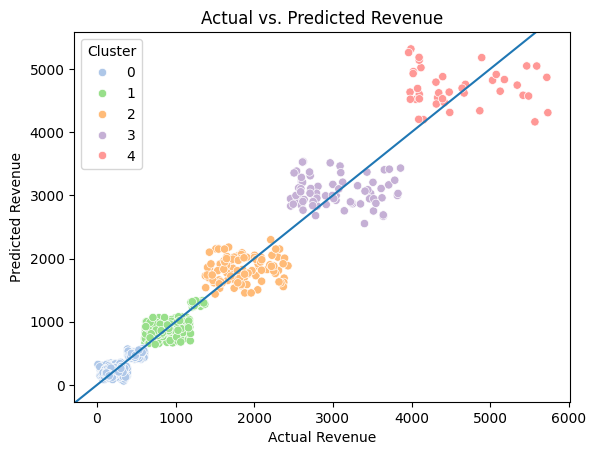

In [117]:
#plot predictions versus actual values
cluster_colors = [colors[1],colors[5],colors[3],colors[9],colors[7]]

sns.scatterplot(data=df_results, x='LTV', y='LTV Predicted',hue='Cluster', palette=cluster_colors)
plt.axline((0, 0), slope=1)
plt.xlabel("Actual Revenue") 
plt.ylabel("Predicted Revenue") 
plt.title("Actual vs. Predicted Revenue") 
plt.show()

In [119]:
#group by clusters and compute the mean values and also the relative error for each cluster
df_results = df_results.groupby(['Cluster'])[['LTV','LTV Predicted','Error']].mean()
df_results['Relative Error'] = df_results['Error'] / df_results['LTV']

df_results

,LTV,LTV Predicted,Error,Relative Error
Cluster,,,,
0,295.698606,292.642671,79.845211,0.270022
1,910.100825,907.944073,133.918145,0.147146
2,1840.995098,1827.380136,270.835466,0.147114
3,3040.485352,3052.141869,410.653950,0.135062
4,4600.689524,4702.673580,528.212953,0.114812
